In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#get the statistical summary of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#check for duplicates
df.duplicated().any()

False

In [6]:
#check for null values
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
df.isnull().sum().sum()

866

In [8]:
#drop columns we wont use in the model
df = df.drop(['Cabin', 'Name', 'Ticket'], axis = 1)
df.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [10]:
#drop null values in embarked column
df.dropna(subset = ['Embarked'], inplace =True)

In [11]:
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
#use fillna to handle null values in the Age column
df['Age'].fillna(29, inplace =True)

In [13]:
#check if any null values are remaining
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [ ]:
#encode the sex and embarked column
df =df.join(pd.get_dummies(df[['Sex']], drop_first =True).astype('int'))

In [ ]:
df =df.join(pd.get_dummies(df[['Embarked']], drop_first =True).astype('int'))

In [27]:
#final dataset
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,29.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
#split the data
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =0)

#scale X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

score = 75.84269662921348 %
confusion score = [[89 16]
 [27 46]] 


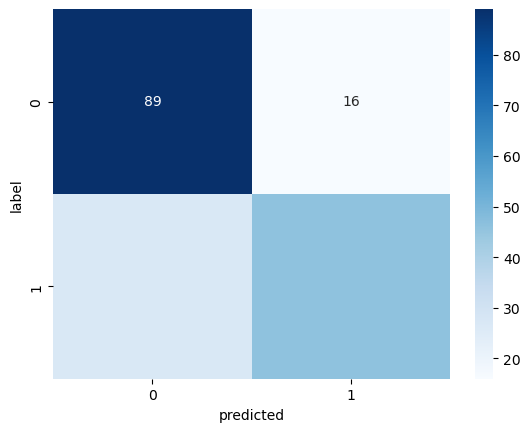

In [155]:
#model 
model = GradientBoostingClassifier(n_estimators =100, learning_rate = 0.1)
model.fit(X_train_scaled, y_train)
predictions =model.predict(X_test_scaled)

#evalute the model
score = accuracy_score(y_test, predictions)
print(f'score = {score*100} %')
conf_score = confusion_matrix(y_test, predictions)
print(f'confusion score = {conf_score} ')

#present the conf matrix
sns.heatmap(conf_score, annot=True, cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('label')
plt.show()

In [159]:
import joblib
joblib.dump(model, 'titanic.joblib')

['titanic.joblib']